# Breast Cancer Prediction
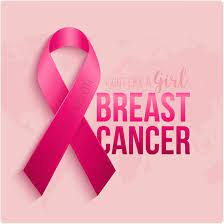
The Breast Cancer Wisconsin (Diagnostic) Dataset (WBCD) is a popular cancer dataset used for binary classification tasks in breast cancer diagnosis. It was obtained from the University of Wisconsin Hospitals, Madison, by Dr. William H. Wolberg. The dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast mass. These features were then used to predict whether a breast mass is benign or malignant.

The dataset consists of 569 instances, with each instance represented by 30 attributes. The attributes include various measures and characteristics derived from the cell nuclei present in the images, such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, and more. These features were computed and analyzed to aid in the diagnosis of breast cancer.

The target variable in this dataset is the diagnosis, which can take two values: "M" for malignant (indicating the presence of cancer) and "B" for benign (indicating the absence of cancer).

Researchers and machine learning practitioners often use this dataset to develop classification models that can accurately distinguish between malignant and benign breast tumors. By training on this dataset, models can learn patterns and relationships between the provided features and the corresponding diagnosis, enabling them to make predictions on new, unseen data.

It is important to note that this dataset is widely used for educational and research purposes. However, when working with real medical data, it is crucial to ensure ethical considerations, patient privacy, and proper data usage guidelines are followed.

## Importing nassaries libries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt


import warnings

warnings.filterwarnings("ignore")

## load dataset

In [4]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Project Deep Learning\CANCER.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# check header columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# drop unvanted columns 

df.drop(["id","Unnamed: 32"],axis=1 ,inplace=True)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
# check data size
df.shape

(569, 31)

In [9]:
# check dataset info it is help to undertand dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# dataset describe by statical tecknis 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Data Visualazation

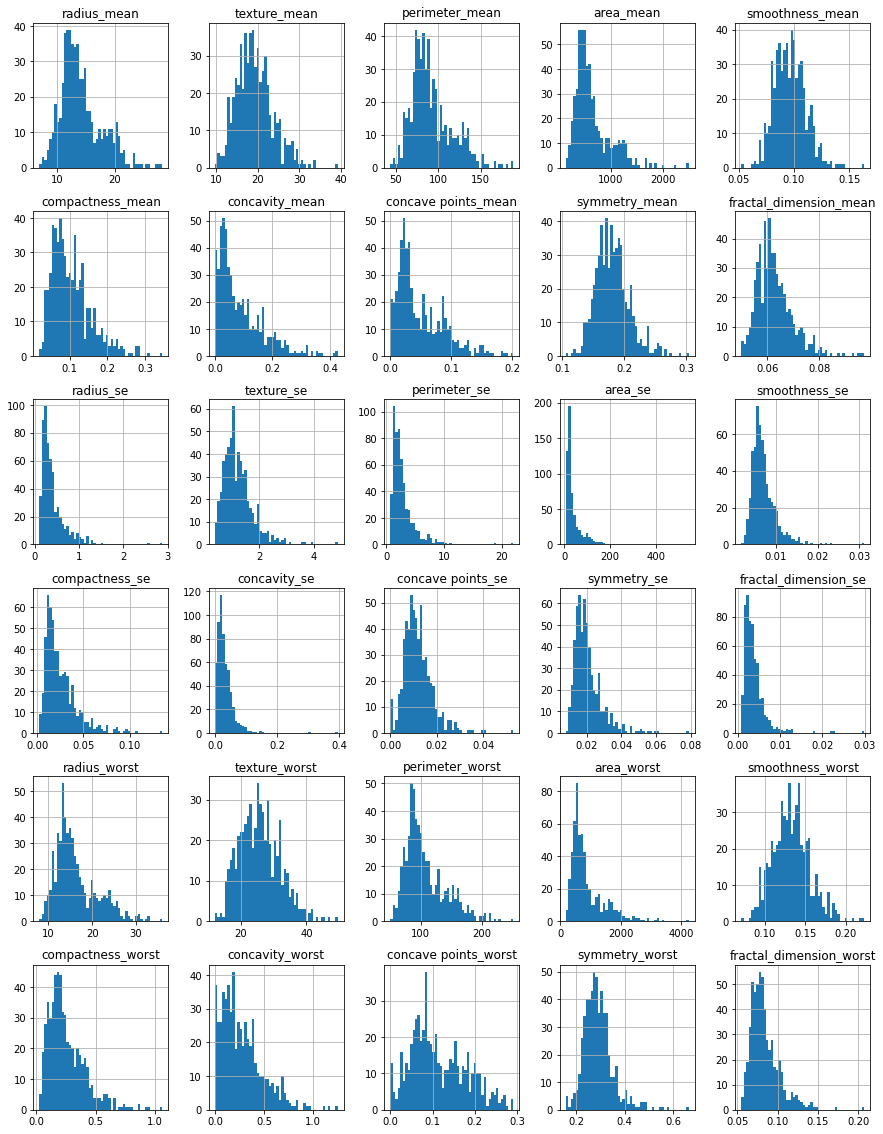

In [11]:
df.hist(bins=50,figsize=(15,20))
plt.show()

<AxesSubplot:>

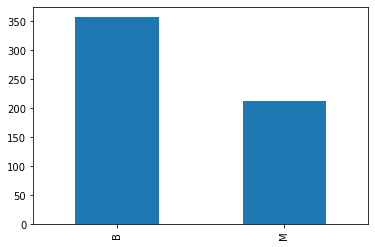

In [12]:
# find the insight og diagnosis columns
df.diagnosis.value_counts().plot.bar()

In [13]:
# replace categorical to numberic
df.diagnosis.replace({"B":0,"M":1},inplace=True)

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


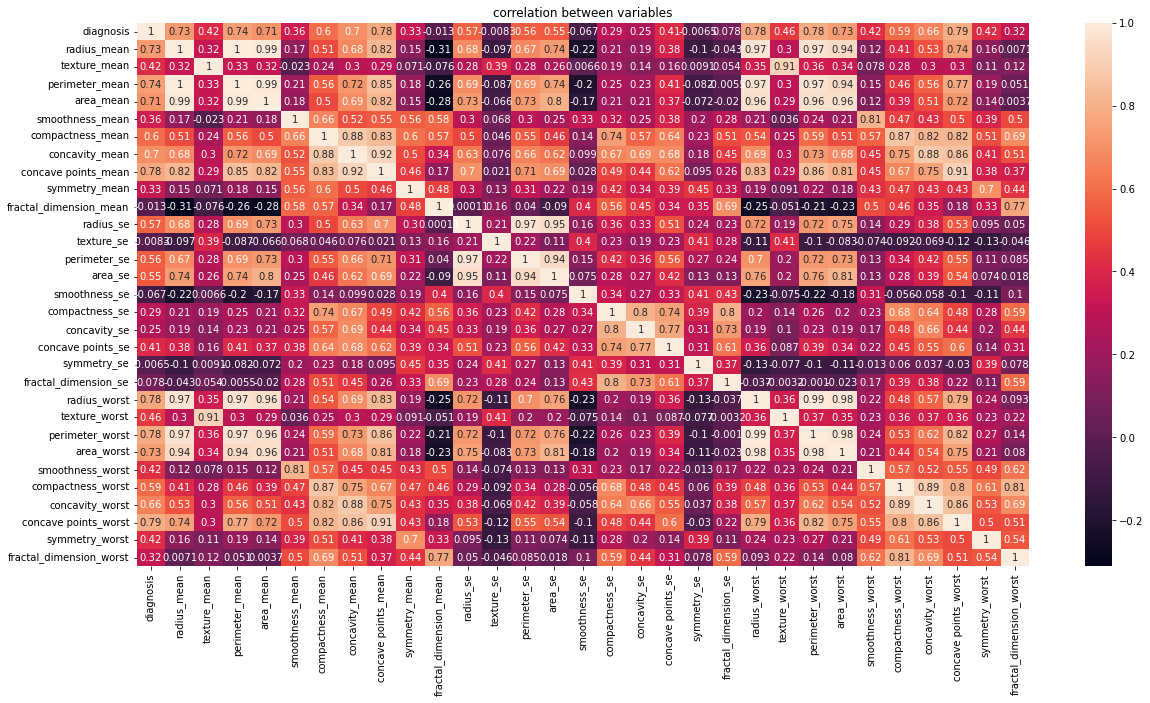

In [17]:
# corraltion check with variebles wise 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation between variables")
plt.show()

## x,y split

In [18]:
# defind indepnded and depended variebles
x = df.iloc[:,1:]
y = df["diagnosis"]

## Train test spliting

In [19]:
from sklearn.model_selection import train_test_split


xtrain ,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=43)

print(xtrain.shape)
print(xtest.shape)

(455, 30)
(114, 30)


## feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [21]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.639047,0.437693,-0.645040,-0.629452,0.099203,-0.440193,-0.797168,-0.698325,0.721149,0.011909,...,-0.672421,0.244490,-0.666514,-0.631130,0.446240,-0.245096,-0.762268,-0.495158,0.263252,-0.585077
1,1.521880,2.169139,1.691894,1.538823,-0.262115,1.872980,1.106993,1.644838,0.271593,-0.071964,...,1.781602,1.689573,2.087075,1.779207,-0.188735,1.686565,0.720013,1.167091,-0.149328,0.892071
2,-0.729320,-0.047567,-0.734498,-0.697035,-0.765000,-0.513785,-0.432157,-0.888338,0.763964,-0.021351,...,-0.668331,0.207804,-0.627055,-0.635252,-0.328868,-0.398793,-0.091952,-0.733603,0.199038,-0.074451
3,0.105711,0.020779,0.084511,0.004037,-0.876283,-0.499363,-0.017066,-0.509576,-1.226930,-0.774762,...,-0.007790,0.432701,0.011062,-0.102714,-1.029530,0.038936,0.493374,-0.296679,-0.706391,-0.523780
4,-0.351299,-0.664964,-0.394231,-0.397817,-1.191115,-0.949423,-0.632975,-0.648228,0.043246,-0.889002,...,-0.502684,-0.586513,-0.498077,-0.497651,-0.994497,-0.663766,-0.474166,-0.499334,0.181379,-0.805090


In [22]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.258204,0.200759,-0.216950,-0.323504,-0.949533,0.319771,0.142766,-0.532854,-0.770238,0.217253,...,-0.183661,-0.028258,0.214246,-0.269347,-0.539066,1.881453,1.826803,0.296226,-0.105983,2.227471
1,-0.833699,2.305832,-0.878693,-0.763496,-1.537642,-1.283733,-1.115463,-1.249642,-2.700478,-1.127607,...,-0.903508,2.013361,-0.958039,-0.774228,-1.740264,-1.251871,-1.321184,-1.727344,-2.159251,-1.376466
2,0.729164,0.533378,0.731957,0.592376,-0.015602,0.528714,0.563837,0.272996,0.282296,-0.904909,...,0.750913,0.533187,0.759015,0.581855,1.046182,0.768073,1.276049,0.976216,3.133654,0.116555
3,-0.277952,-0.134139,-0.253305,-0.346779,1.371912,0.334563,0.411853,0.607480,1.110052,0.716152,...,-0.136626,0.362521,-0.145007,-0.224855,2.022730,0.971568,1.082541,1.386299,1.587683,1.844364
4,0.551438,-0.273111,0.527716,0.433934,0.062578,0.160751,0.061417,0.254020,0.157419,-0.048827,...,0.732508,-0.064943,0.626504,0.588726,-0.044224,-0.214971,0.024249,0.085965,-0.191067,-0.143410


## Creating model function for hyperpramater

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

def hp_model(hp):
    nn = Sequential()
    
    hp_units1 = hp.Int("units1",min_value=32,max_value=512,step=32)
    hp_units2 = hp.Int("units2",min_value=32,max_value=512,step=32)
    hp_units3 = hp.Int("units3",min_value=32,max_value=512,step=32)
    
    
    nn.add(Dense(units=hp_units1,input_dim=xtrain.shape[1],activation="relu"))
    nn.add(Dense(units=hp_units2,activation="relu"))
    nn.add(Dense(units=hp_units3,activation="relu"))
    
    nn.add(Dense(units=1,activation="sigmoid"))
    
    nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return nn
                       

In [26]:
tuner = kt.Hyperband(hp_model,
                     objective="val_loss",
                    max_epochs=10,
                    directory="keras_tuner_dim",
                    project_name = "keras_tuner_proj")

In [27]:
tuner.search(xtrain,ytrain,validation_split = 0.2,epochs=30)

Trial 30 Complete [00h 00m 04s]
val_loss: 0.1891150027513504

Best val_loss So Far: 0.13603851199150085
Total elapsed time: 00h 01m 53s
INFO:tensorflow:Oracle triggered exit


In [28]:
hparam = tuner.get_best_hyperparameters()[0]

In [29]:
hparam.get("units1")

512

In [30]:
hparam.get("units2")

384

In [31]:
hparam.get("units3")

64

In [33]:
nn = Sequential()

nn.add(Dense(units=512,input_dim=xtrain.shape[1],activation="relu"))
nn.add(Dense(units=384,activation="relu"))
nn.add(Dense(units=64,activation="relu"))

nn.add(Dense(units=1,activation="sigmoid"))

In [34]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               15872     
                                                                 
 dense_5 (Dense)             (None, 384)               196992    
                                                                 
 dense_6 (Dense)             (None, 64)                24640     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 237,569
Trainable params: 237,569
Non-trainable params: 0
_________________________________________________________________


In [35]:
Early_stop = EarlyStopping(monitor="val_loss",patience=10)

In [36]:
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [37]:
hist = nn.fit(xtrain,ytrain,validation_split=0.2,epochs=100,callbacks=[Early_stop])

Epoch 1/100
12/12 [==============================] - 2s 62ms/step - loss: 0.2590 - accuracy: 0.9148 - val_loss: 0.2091 - val_accuracy: 0.9011
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0454 - accuracy: 0.9780 - val_loss: 0.1804 - val_accuracy: 0.9231
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0219 - accuracy: 0.9890 - val_loss: 0.1752 - val_accuracy: 0.9560
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0125 - accuracy: 0.9918 - val_loss: 0.1954 - val_accuracy: 0.9451
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0083 - accuracy: 0.9945 - val_loss: 0.2486 - val_accuracy: 0.9341
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0062 - accuracy: 0.9973 - val_loss: 0.1781 - val_accuracy: 0.9451
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2039 - val_accuracy: 0.9341
Epoch 

## check learning curve

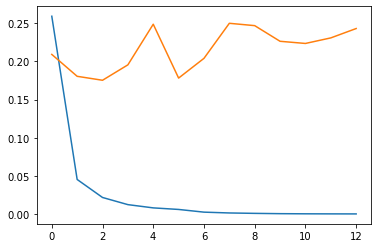

In [40]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

## evaluate

In [41]:
nn.evaluate(xtrain,ytrain)

15/15 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9890


[0.04882385581731796, 0.9890109896659851]

In [42]:
nn.evaluate(xtest,ytest)

4/4 [==============================] - 0s 9ms/step - loss: 0.1792 - accuracy: 0.9649


[0.17919544875621796, 0.9649122953414917]

# Prediction

In [43]:
test_prob = nn.predict(xtest)

4/4 [==============================] - 0s 9ms/step


In [44]:
test_prob[:5]

array([[3.4892485e-06],
       [1.6120583e-16],
       [9.9999994e-01],
       [9.9998468e-01],
       [9.9957103e-01]], dtype=float32)

In [45]:
test_pred = []

for i in test_prob:
    if i >=0.5:
        test_pred.append(1)
    else:
        test_pred.append(0)

In [46]:
test_pred[:5]

[0, 0, 1, 1, 1]

## Check sklearn metricx

[[73  2]
 [ 2 37]]


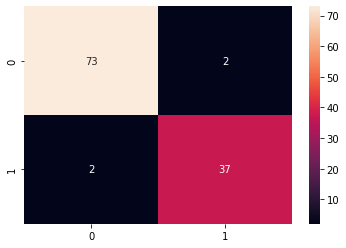

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(ytest,test_pred))
sns.heatmap(confusion_matrix(ytest,test_pred),annot=True,fmt="d")
plt.show()

In [50]:
# check classification_report for sklern metrix
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

